<h1 align="center"> Quick Dive into Scientific Computing with Python and Jupyter </h1>
<h2 align="center"> Part 1: Basics of Scientific Computing </h2> 

First of all, we asume that you know at least a little bit of Python (sorry if not!)

**Basic Python Facts**
* Python is an interpreted programming language --> no need compilation
* Python uses indentation blocks --> no brackets, good readability
* Python is multi-paradigm --> imperative, object-oriented, scripting or functional programming

**Basic Jupyter Facts**
* IPython is an interactive Python console --> autocompletion, history, etc.
* IPython Notebooks is the evolution of IPython --> embedded figures, markdown, latex code, etc.
* Is the evolution of IPython Notebooks --> Web-based server

## 1.- Required Packages

* Install Anaconda Python Distribution
    * You can download it from https://www.continuum.io (we recommend Python 3.5)
* [Optional] Create an environment
    * If you already have Anaconda, and you do not want to mess it up, you can create an environment
    * ``> conda create --name sochias jupyter python=3.5``
    * ``> source activate sochias``
    * If you want to remove it later, run ``> conda remove --name flowers --all``
* Update Conda
    * ``> conda update --all``
* Install Jupyter
    * ``> conda install jupyter``
* [Alternative] Using pip
    * ``> pip install notebook``
* Install packages
    * ``> conda install numpy scipy matplotlib``
    * ``> pip install [package]``
* Start using Jupyter
    * ``> jupyter notebook``
    * [Alternative] ``> ipython notebook``

## 2.- Jupyter markdown and code cells

This is a markdown cell:
* Bullets
* Latex formulas: $\int_a^b x dx$
* [Links](http://www.google.cl)
* Code: ``python setup.py``
```Python
for i in range(10):
    print(i**2)
```
* Tables

| **X** | **Y** |
|-------|-------|
| 3.145 | 2.34  |
| 0.32  | 3     |
* Images
<img src="data/doge.jpg" width="400">

In [1]:
# This is a code cell (python code)
import math
a = [1,2,3,4,5]
b = []
for i in a:
    b.append(i*i)
print(a)
# The last line is returned as output of the cell
b

[1, 2, 3, 4, 5]


[1, 4, 9, 16, 25]

## 3.- Composite Python types

<font color='red'>HANDS ON SECTION!</font>

#### Lists
A collection of elements in an array __of any type__!

In [2]:
lst = [42,42.0,"42"]
lst

[42, 42.0, '42']

#### Tuples
like lists, but inmutables (i.e., cannot be changed). Any operation over tuples __creates a new tuple__

In [3]:
tup = (42,42.0,'42')
tup

(42, 42.0, '42')

In [4]:
lst[0]=32
lst

[32, 42.0, '42']

In [5]:
tup[0]=32
tup

TypeError: 'tuple' object does not support item assignment

#### Dictionaries
Also known as keymaps, hashmaps, associative arrays or similar. Is a list, where every element has a __key__ associated with it

In [6]:
dt ={'uno':1,'dos':2,'dos y medio':2.5,'tres':3}
print(dt['uno'])
print(dt['dos y medio'])

1
2.5


## 4.- Imports
<font color='red'>HANDS ON SECTION!</font>

Imports do not import the code of a library, but the namespace of it and a few initialization.

In [7]:
# Original Namespace Import
import numpy
a = numpy.array([1,2,3,4])

# Renaming Namespace Import
import numpy as np
b = np.array([1,2,3,4])

# Namespace Inclusion Import
from numpy import *
c = array([1,2,3,4])

print(np.array_equal(a,b))
np.array_equal(a,c);


True


## 5.- IPython Magics
<font color='red'>HANDS ON SECTION!</font>

`IPython magics` are custom commands that let you interact with your `OS` and filesystem. There are line magics `%` (which just affect the behavior of such line) and cell magics `%%` (which affect the whole cell). 

In [8]:
# this will list all magic commands
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [9]:
# also work in ls, cd, mkdir, etc
%pwd

'/Users/martin/Repositories/notebooks/course'

In [13]:
%history -l 5

# this will list all magic commands
%lsmagic
# also work in ls, cd, mkdir, etc
%pwd
%history
%history?
%history -l 10


In [20]:
%timeit [i for i in range(10000)]

1000 loops, best of 3: 473 µs per loop


In [21]:
%%bash
cd ..
ls

ACALib Tests
README.md
course
images
sandbox
wip


In [17]:
%%writefile test.txt
hello world!!!

Writing test.txt


In [19]:
%%bash
cat test.txt
rm test.txt

hello world!!!

## 6.- Scientific Computing: `NumPy`

<a href="http://www.numpy.org">NumPy</a> is the main Python package for working with N-dimensional arrays. Any list of numbers can be recast as a NumPy array.

The reasons of why you should use NumPy instead of any other __iterable object_ in Python are:
* NumPy provides an ndarray structure for storing numerical data __in a contiguous way__.
* Also implements fast __mathematical operations__ on ndarrays, that exploit this contiguity.
* __Brevity of the syntax for array operations__. A language like C or Java would require us to write a loop for a matrix operation as simple as C=A+B.

### The `numpy.ndarray` structure

The `ndarray` is the NumPy object that let us create __$N$-dimensional arrays__. It is essentially defined by:
1. A number of __dimensions__
2. a __shape__
3. __strides__
4. __data type__ or __dtpe__
5. The __data buffer__.

<img src='data/ndarray.png' style="width: 500px;">

### How an `ndarray` is stored in memory?

When there is more than one dimension, there are two ways of storing the elements in the memory block:
1. Elements can be stored in __row-major order__ (also known as __C-order__) or,
2. In __column-major order__ (also known as __Fortran-order__).

<img src='data/ndarray_storage.png' style="width: 800px;">

### Creating Arrays
<font color='red'>HANDS ON SECTION!</font>

There are several NumPy functions for creating common types of arrays. Below is a list of the most common used:

In [27]:
# Arrays of zeros: np.zeros(shape)
print("Zeros:")
print( np.zeros((3,3)) )

# Arrays of ones: np.ones(shape)
print("\nOnes:")
print( np.ones((3,3)) )

# Empty array: np.empty(shape)
print("\nEmpty:")
print( np.empty((3,3)) )

# Range of values: np.range(start, stop, step)
print("\nRange:")
print( np.arange(0., 10., 1.) )

# Regular grid: np.linspace(start, end, n_values)
print("\nRegular grid:")
print( np.linspace(0., 1., 9) )

# Array constructor: np.array( python_iterable )
print("\nArray constructor")
print( np.array([2, 3, 5, 10, -1]) )

Zeros:
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

Ones:
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]

Empty:
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]

Range:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]

Regular grid:
[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]

Array constructor
[ 2  3  5 10 -1]


Also `NumPy` provides useful functions to create matrices filled with random values, from different random distributions:

In [9]:
# Random secuences: np.random
print("\nRandom sequences: Uniform distribution")
print( np.random.uniform(10, size=6) )

# Random secuences: np.random
print("\nRandom sequences: Normal (0,1) distribution")
print( np.random.randn((6)) )


Random sequences: Uniform distribution
[ 6.76059385  9.3595452   8.27168374  6.00237325  8.26527413  8.52658322]

Random sequences: Normal (0,1) distribution
[ 0.5453444   0.29310484 -0.25943227 -1.0602502  -1.02491846 -0.46468018]


For a full list of all the available random distributions see [here](https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.random.html).

### Basic Mathematical operations
<font color='red'>HANDS ON SECTION!</font>

Most of the operations performed in NumPy are handled __element-wise__, i.e, computing C = A + B will translates into $C[i,j] = A[i,j] + B[i,j]$. (The only exception is __broadcasting__, and will be explained soon).

Below is a list with the most common used mathematical operations. For a comprehensive list see here: [NumPy mathematical functions](https://docs.scipy.org/doc/numpy/reference/routines.math.html).

In [28]:
# first we create two random arrays:
A = 5*np.ones((5,5))
B = -3*np.ones((5,5))

In [29]:
# sum
print("Sum:")
print( A+B )

# subtraction
print("\nSubtraction")
print( A-B )

# product
print("\nProduct")
print( A*B )

# matricial product
print("\nMatricial Product")
print( np.dot(A,B) )

# power
print("\n Power")
print( A**2 )

# Some common mathematical functions
print("\n np.exp()")
print( np.exp(A) )
print("\n np.sin()")
print( np.sin(A) )

Sum:
[[ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]
 [ 2.  2.  2.  2.  2.]]

Subtraction
[[ 8.  8.  8.  8.  8.]
 [ 8.  8.  8.  8.  8.]
 [ 8.  8.  8.  8.  8.]
 [ 8.  8.  8.  8.  8.]
 [ 8.  8.  8.  8.  8.]]

Product
[[-15. -15. -15. -15. -15.]
 [-15. -15. -15. -15. -15.]
 [-15. -15. -15. -15. -15.]
 [-15. -15. -15. -15. -15.]
 [-15. -15. -15. -15. -15.]]

Matricial Product
[[-75. -75. -75. -75. -75.]
 [-75. -75. -75. -75. -75.]
 [-75. -75. -75. -75. -75.]
 [-75. -75. -75. -75. -75.]
 [-75. -75. -75. -75. -75.]]

 Power
[[ 25.  25.  25.  25.  25.]
 [ 25.  25.  25.  25.  25.]
 [ 25.  25.  25.  25.  25.]
 [ 25.  25.  25.  25.  25.]
 [ 25.  25.  25.  25.  25.]]

 np.exp()
[[ 148.4131591  148.4131591  148.4131591  148.4131591  148.4131591]
 [ 148.4131591  148.4131591  148.4131591  148.4131591  148.4131591]
 [ 148.4131591  148.4131591  148.4131591  148.4131591  148.4131591]
 [ 148.4131591  148.4131591  148.4131591  148.4131591  148.4131591]
 [ 148.4

### Boolean operations
<font color='red'>HANDS ON SECTION!</font>

Comparisons in `NumPy` work exaclty the same way as mathematical operations, i.e, __element wise!__. Let's see some examples. 

Arrays to compare:

In [11]:
# Creating two 2d-arrays
A = np.array( [[1, 2, 3], [2, 3, 5], [1, 9, 6]] )
B = np.array( [[1, 2, 3], [3, 5, 5], [0, 8, 5]] )
print("A:"); print(A, '\n')
print("B:"); print(B)

A:
[[1 2 3]
 [2 3 5]
 [1 9 6]] 

B:
[[1 2 3]
 [3 5 5]
 [0 8 5]]


In [12]:
print("A > B:")
print( A > B )

print("\nA =< B:")
print( A <= B )

print("\n A==B:")
print( A==B )

print("\n A!=B:")
print( A!=B )

A > B:
[[False False False]
 [False False False]
 [ True  True  True]]

A =< B:
[[ True  True  True]
 [ True  True  True]
 [False False False]]

 A==B:
[[ True  True  True]
 [False False  True]
 [False False False]]

 A!=B:
[[False False False]
 [ True  True False]
 [ True  True  True]]


Now we create to boolean arrays and perform some logical operations over them:

In [13]:
# Creating two 2d boolean arrays
C = A==B; print('C:'); print(C,'\n')
D = A>=B; print('D:'); print(D)

C:
[[ True  True  True]
 [False False  True]
 [False False False]] 

D:
[[ True  True  True]
 [False False  True]
 [ True  True  True]]


In [14]:
print("\n A and B:")
print( C & D)
print( np.logical_and(C,D) )

print("\n A or B:")
print( C | D)
print( np.logical_or(C,D) )

print("\n not A:")
print( ~C )
print( np.logical_not(C))


 A and B:
[[ True  True  True]
 [False False  True]
 [False False False]]
[[ True  True  True]
 [False False  True]
 [False False False]]

 A or B:
[[ True  True  True]
 [False False  True]
 [ True  True  True]]
[[ True  True  True]
 [False False  True]
 [ True  True  True]]

 not A:
[[False False False]
 [ True  True False]
 [ True  True  True]]
[[False False False]
 [ True  True False]
 [ True  True  True]]


### Some _important_ matricial operations
<font color='red'>HANDS ON SECTION!</font>

__Solving a linear system of equations__: $A x = b$

In [25]:
A = np.random.random((10,10))
b = np.random.random(10)

In [26]:
x = np.linalg.solve(A,b)
print('Solution:', x)

Solution: [-2.08716546 -0.65464238  1.1377679  -4.19934891 -0.88063218  1.62976879
 -2.27949468  2.63822321  4.36579445  1.57532871]


__Matricial norm__

In [52]:
## norm-2
np.linalg.norm(A, ord=2)

4.9064878325646113

__Determinant of a matrix__

In [47]:
np.linalg.det(A)

0.027602455079755176

__SVD decomposition__

In [49]:
S,V,D = np.linalg.svd(A)

### The beneficts of using NumPy instead of Python

In [15]:
#Python Lists implementation
def norm_square_list(vector):
    norm = 0
    for v in vector:
        norm += v*v
    return norm

#Vectorized NumPy implementation
def norm_square_numpy(vector):
    return np.sum(vector * vector)

#Vector to use - dimension 10^6
vector = list(range(1000000))
npvector = np.array(vector)

In [16]:
%timeit norm_square_list(vector)

10 loops, best of 3: 119 ms per loop


In [17]:
%timeit norm_square_numpy(npvector)

100 loops, best of 3: 4.6 ms per loop


## 6.- Scientific Computing: `SciPy` 
<a href="http://www.scipy.org">SciPy</a> provides a number of subpackages that deal with common operations in scientific computing, such as numerical integration, optimization, interpolation, Fourier transforms and linear algebra.
#### Example 1: Numerical integration
$$f(x)=\int_0^{\pi} x^3dx$$

In [53]:
import scipy as sp
import scipy.integrate as integrate

def f(x):
    return x**3

ans, err = integrate.quad(f,0,np.pi)
print(ans,' +-',err)

24.35227275850061  +- 2.7036453918439354e-13


#### Example 2: Solving an ODE numerically

$$
\frac{dy}{dt} = f(y) = y^2 \cdot \sin(y) \ \ \text{with} \ \ y(0) = y_0
$$

In [74]:
def f(y, t):
    return y**2 * np.sin(y)

ic = 1.
times = np.linspace(0., 10., 100)
sol = integrate.odeint(f, ic, time)

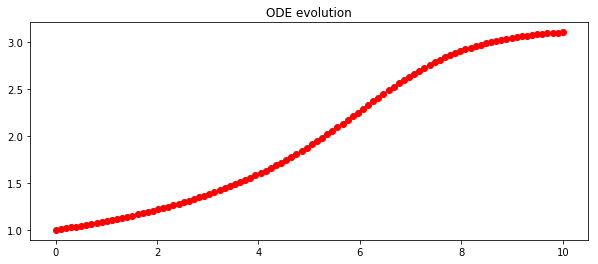

In [75]:
plt.figure(figsize=(10,4))
plt.plot(times, sol, 'ro-')
plt.title('ODE evolution')
plt.show()

## 6.-  Matplotlib

In the next section we will see how to do some of the most common tasks in __data visualization__, with `Matplotlib`.

__The Matplotlib Philosophy:__ 
1. Configure the object to visualize through the `matplotlib.pyplot` API.
2. Display the canvas and the created object with the `matplotlib.pyplot.show()` function.
3. After the call to the `show()` function, `matplotlib.pyplot` reset the state of the _canvas_ to `None`.

In [81]:
import matplotlib.pyplot as plt

There are different ways to display a plot in the Jupyter Notebook, by changing the backend that handles the plot. But __changing between backends in the same session doesn't work properly right now__, so it is recommended to restart the kernel every time you change the backend.

In [78]:
%matplotlib inline

__Inline Mode:__ Figures created in this mode are converted to PNG images stored within the notebook .ipynb  les. This is convenient when sharing notebooks because the plots are viewable by other users. 

In [79]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt', 'qt4', 'qt5', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl']


### Simple plots
<font color='red'>HANDS ON SECTION!</font>

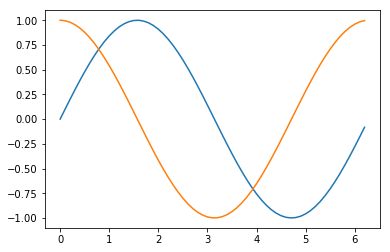

In [85]:
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)
z = np.cos(x)
plt.plot(x,y)
plt.plot(x,z)
plt.show()

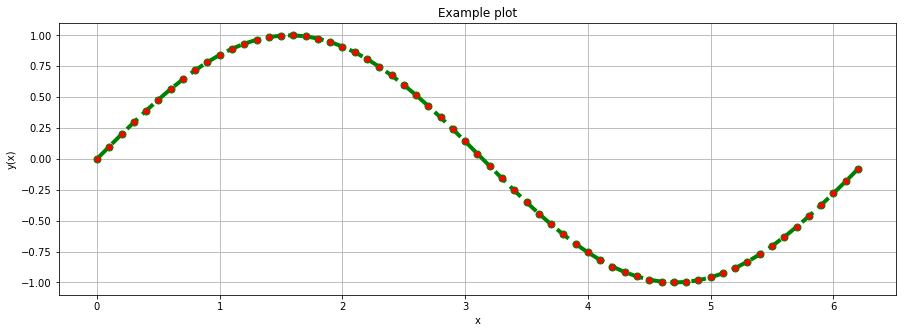

In [93]:
plt.figure(figsize=(15,5))
plt.plot(x, y, 'o--', lw=4, color='green', mfc='red', ms=7)
plt.title("Example plot")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()
plt.show()

### Scatter plot

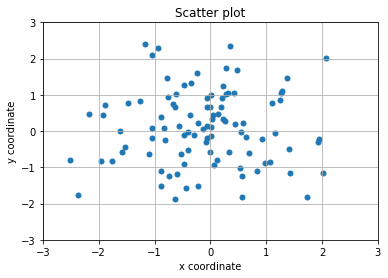

In [95]:
x = np.random.randn(100)
y = np.random.randn(100)

plt.scatter(x, y, marker='o', s=25)
plt.grid()
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter plot')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

### Histogram plot

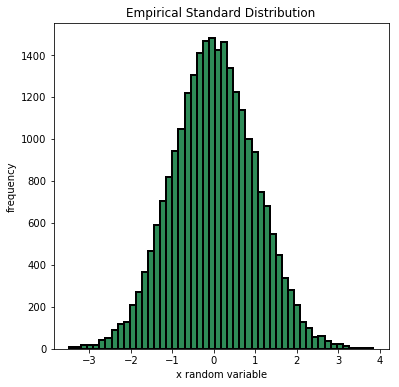

In [97]:
n_samples = 25000
#x = np.random.rand(n_samples)
x = np.random.randn(n_samples)

plt.figure(figsize=(6,6))
plt.hist(x, bins=50, facecolor='seagreen', edgecolor='black', lw=2)
plt.title("Empirical Standard Distribution")
plt.xlabel("x random variable")
plt.ylabel("frequency")
plt.show()

### Image visualization
<font color='red'>HANDS ON SECTION!</font>

In [102]:
# we first load the image
import matplotlib.image as mpimg

img = mpimg.imread('data/cat.jpg')
print(img.shape)

(521, 750, 3)


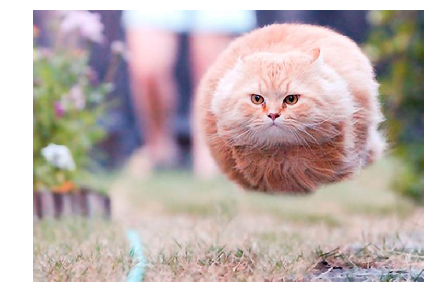

In [103]:
plt.figure(figsize=(7,7))
plt.imshow(img)
plt.axis('off')
plt.show()

## 7.- Interactive Visualization with `interact` IPython widget

The `interact` function (`ipywidgets.interact`) automatically creates a user interface (UI) controls for exploring code and data interactively. It is the __easiest way__ to get started using IPython’s widgets.

In [20]:
from ipywidgets import interact, IntSlider, FloatSlider

At the most basic level, `interact` autogenerates UI controls for function arguments, and then __calls the function__ with those arguments when you manipulate the controls interactively. To use `interact`
, you __need to define a function that you want to explore__. Here is a function that prints its only argument x.

In [21]:
def f(x):
    return x

* __Checkbox:__ If you pass True or False, interact will generate a checkbox:

In [22]:
interact(f, x=True);

* __Textbox:__  If you pass a string, `interact` will generate a text area box:

In [23]:
interact(f, x='hi there!');

* __IntSlider__: When you pass an integer-valued keyword argument of 10 (x=10) to interact, it generates an integer-valued slider control with a range of [-10,+3*10].

In [24]:
interact(f, x=10);

In this case, 10 is an abbreviation for an actual slider widget:

In [25]:
IntSlider(min=-10,max=30,step=1,value=10)

In [26]:
interact(f, x=IntSlider(min=-10,max=30,step=1,value=10));

but you can also use this abbreviation in order to avoid instantiating `IntSlider` by yourself:

In [27]:
interact(f, x=(-50,50,2));

* __FloatSlider__: The same applies also for float arguments with the sliders:

In [28]:
interact(f, x=FloatSlider(min=-2., max=7., step=0.1, value=0.));

In [29]:
interact(f, x=(-2., 7., 0.1));

* __Dropdown:__ If you pass a list or a dictionary, then it will generate a dropdown widget:

In [30]:
interact(f, x=['orange', 'apple']);

In [31]:
interact(f, x={1:'orange', 2:'apple'});

### Fixing arguments using `fixed`

There are times when you may want to explore a function using interact, but fix one or more of its arguments to specific values. This can be accomplished by wrapping values with the `fixed` function.

In [32]:
from ipywidgets import fixed

In [33]:
def h(p, q):
    return (p, q)

In [34]:
interact(h, p=5, q=1);

In [35]:
interact(h, p=5, q=fixed(10));

### Using `interact` for visualization

Now with all your knowledge of __`matplotlib`__ and __`interact`__ you have all what you need to perform __interactive visualization__!

In this section we will use this tools to perform interactive data visualization over a __3D spectroscopic data line cube__ of  __Orion Nebulae__. We first load the data:

In [31]:
!wget http://alumnos.inf.utfsm.cl/~mavillan/press/orion.npy

--2017-06-14 18:07:20--  http://alumnos.inf.utfsm.cl/~mavillan/press/orion.npy
Resolving alumnos.inf.utfsm.cl... 204.87.169.27
Connecting to alumnos.inf.utfsm.cl|204.87.169.27|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1640080 (1.6M)
Saving to: ‘orion.npy.1’

orion.npy.1         100%[===================>]   1.56M  1.79MB/s    in 0.9s    

2017-06-14 18:07:20 (1.79 MB/s) - ‘orion.npy.1’ saved [1640080/1640080]



In [32]:
data = np.load("orion.npy")
print('Shape:', data.shape)
print('Data type:', data.dtype)

Shape: (41, 100, 100)
Data type: >f4


The `axis0` is for frequency and the other two are for spatial coordinates. We want to see images of the slices in the frequency axis, in a interactive way.

For that we need to define the corresponding function to pass to `interact`:

In [37]:
def slice_show(data, i):
    plt.figure(figsize=(8,8))
    plt.imshow(data[i,:,:], cmap='afmhot', vmin=0., vmax=1.)
    plt.grid()
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.show()

In [38]:
interact(slice_show, data=fixed(data), i=(0,40));

/Users/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


__Let's improve the interactivity!__

In [39]:
def slice_show2(data, i, title='', show_colorbar=False, colormap='afmthot'):
    plt.figure(figsize=(8,8))
    plt.imshow(data[i,:,:], cmap=colormap, vmin=0., vmax=1.)
    plt.grid()
    plt.title(title)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    if show_colorbar: plt.colorbar()
    plt.show()

In [40]:
# full list of available colormaps:
# https://matplotlib.org/examples/color/colormaps_reference.html
colormap_list = ['afmhot','gray','plasma','inferno','copper','gist_heat','jet',]

interact(slice_show2, data=fixed(data), i=(0,40), title='Orion Nebulae', \
         show_colorbar=False, colormap=colormap_list);

/Users/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


Finally we will use the _Scikit-image_ library to extend our interactive visualization, by adding image processing over each slice of the cube, applying different filters/kernels to the image:

In [41]:
def slice_show3(data, i, title='', show_colorbar=False, colormap='afmthot', img_filter=None):
    if img_filter is not None:
        _data = np.empty(data.shape)
        for j in range(data.shape[0]):
            _data[i,:,:] = img_filter(data[i,:,:])
        data = _data
        
    plt.figure(figsize=(8,8))
    plt.imshow(data[i,:,:], cmap=colormap, vmin=data.min(), vmax=data.max())
    plt.grid()
    plt.title(title)
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    if show_colorbar: plt.colorbar()
    plt.show()

In [42]:
from skimage import filters

# dictionary with the kernel to be used
filters = {'none':None, 'gaussian':filters.gaussian, 'hessian':filters.hessian, 'laplace':filters.laplace, \
           'sobel':filters.sobel, 'frangi':filters.frangi, 'median':filters.median, 'prewitt':filters.prewitt}

# full list of available filters:
# http://scikit-image.org/docs/dev/api/skimage.filters.html

In [43]:
interact(slice_show3, data=fixed(data), i=(0,40), title='Orion Nebulae', \
         show_colorbar=False, colormap=colormap_list, img_filter=filters);

/Users/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


## Additional Advanded Libraries

### Scikit-learn

<a href="http://scikit-learn.org">scikit-learn</a> provides algorithms for machine learning tasks, such as classification, regression, and clustering, as well as associated operations, such as cross-validation and feature normalization. These topics will be covered in greater depth in Guillermo Cabrera's talks <a href="">here</a>. A related module is <a href="http://www.astroml.org">astroML</a> which is a wrapper around a lot of the scikit-learn routines but also offers some additional functionality and faster/alternate implementations of some methods.

### Cython 
__Cython__ is both a __Superset of Python__ and a __Python Library__ that lets you combine C and Python in various ways. There are two main use-cases: Optimizing your Python code by statically compiling it to C, and Wrapping a C/C++ library in Python.

### Numba
Numba gives you the power to speed up your applications with high performance functions written directly in Python. With a few annotations, array-oriented and math-heavy Python code can be just-in-time compiled to native machine instructions, similar in performance to C, C++ and Fortran, without having to switch languages or Python interpreters (__Just in Time Compilation__).


### Pandas
<a href="http://pandas.pydata.org/index.html">Pandas</a> offers data structures, particularly data frames, and operations for manipulating numerical tables and time series, such as fancy indexing, reshaping and pivoting, and merging, as well as a number of analysis tools. Although similar functionality already exists in numpy, pandas is highly optimized for performance and large data sets.  Some of these topics will be covered in greater depth in Mauricio San Martin's talk <a href="placeholder">here</a>.